Code: Use Pandas to read the CSV file and store them in a DataFrame object named badminton2.
Next, it will display the data frame.

In [1]:
import pandas as pd
badminton = pd.read_csv('badmintondata.csv', header='infer')

badminton

,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres
0,4,1,10,40,0,4.075543,1.0,1.662912
1,4,1,10,40,0,4.152007,1.0,1.724866
2,4,1,10,40,0,4.228906,1.0,1.788139
3,4,1,10,40,0,4.302100,1.0,1.845245
4,4,1,10,40,0,4.376877,1.0,1.904128
...,...,...,...,...,...,...,...,...
72795,0,0,0,0,0,0.000000,0.0,0.000000
72796,0,0,0,0,0,0.000000,0.0,0.000000
72797,0,0,0,0,0,0.000000,0.0,0.000000
72798,0,0,0,0,0,0.000000,0.0,0.000000


Check Data Types

In [2]:
badminton.dtypes

HUMAN PLAYER POSITION (X) metres                 int64
HUMAN PLAYER POSITION (Y) metres                 int64
INITITAL VELOCITY OF SHUTTELCOCK(m/s)            int64
INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)        int64
SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)      int64
SHUTTLECOCK POSITIION IN AIR(X ) metres        float64
SHUTTLECOCK POSITIION IN AIR(Y) metres         float64
SHUTTLECOCK POSITIION IN AIR(Z) metres         float64
dtype: object

Identify if there is any Missing Data in the attributes

In [3]:
print(badminton.isnull().sum())

HUMAN PLAYER POSITION (X) metres               0
HUMAN PLAYER POSITION (Y) metres               0
INITITAL VELOCITY OF SHUTTELCOCK(m/s)          0
INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)      0
SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)    0
SHUTTLECOCK POSITIION IN AIR(X ) metres        0
SHUTTLECOCK POSITIION IN AIR(Y) metres         0
SHUTTLECOCK POSITIION IN AIR(Z) metres         0
dtype: int64


Initialize SHOT ID to each group

In [4]:
# Create boolean mask if all row values are 0
mask = (badminton == 0).all(axis=1)

# Identify where the 'all zeros' condition changes
changes = mask.ne(mask.shift())

# Cumulatively sum these changes, assign SHOT_ID to each group
badminton['SHOT_ID'] = changes.cumsum()

# For 'all zero' rows, assign SHOT_ID as 0
badminton.loc[mask, 'SHOT_ID'] = 0

Identify Duplicate Data

In [5]:
# Check whether each row is a duplicate of a previous row in the table
dups = badminton.duplicated()

dups

0        False
1        False
2        False
3        False
4        False
         ...  
72795     True
72796     True
72797     True
72798     True
72799     True
Length: 72800, dtype: bool

In [6]:
duplicate = badminton[badminton.duplicated()]

duplicate

,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres,SHOT_ID
123,0,0,0,0,0,0.0,0.0,0.0,0
124,0,0,0,0,0,0.0,0.0,0.0,0
125,0,0,0,0,0,0.0,0.0,0.0,0
126,0,0,0,0,0,0.0,0.0,0.0,0
127,0,0,0,0,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
72795,0,0,0,0,0,0.0,0.0,0.0,0
72796,0,0,0,0,0,0.0,0.0,0.0,0
72797,0,0,0,0,0,0.0,0.0,0.0,0
72798,0,0,0,0,0,0.0,0.0,0.0,0


The results suggest there are 112715 duplicate rows in the dataset.

In [7]:
# Drop duplicate data
print('Number of rows before discarding duplicates = %d' % (badminton.shape[0]))
data2 = badminton.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 72800
Number of rows after discarding duplicates = 39159


Remove rows that are all zeros

In [8]:
data2 = data2.loc[~(data2==0).all(axis=1)]

data2

,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres,SHOT_ID
0,4,1,10,40,0,4.075543,1.000000,1.662912,1
1,4,1,10,40,0,4.152007,1.000000,1.724866,1
2,4,1,10,40,0,4.228906,1.000000,1.788139,1
3,4,1,10,40,0,4.302100,1.000000,1.845245,1
4,4,1,10,40,0,4.376877,1.000000,1.904128,1
...,...,...,...,...,...,...,...,...,...
72634,4,4,70,70,15,9.217823,5.398111,2.591053,727
72635,4,4,70,70,15,9.275177,5.413480,2.041410,727
72636,4,4,70,70,15,9.326363,5.427195,1.463594,727
72637,4,4,70,70,15,9.370879,5.439123,0.862842,727


Remove abnormal values (Value is Negative or Value = 0)

In [9]:
data2 = data2[(data2[data2.columns] >= 0).all(axis=1)]

data2

,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres,SHOT_ID
0,4,1,10,40,0,4.075543,1.000000,1.662912,1
1,4,1,10,40,0,4.152007,1.000000,1.724866,1
2,4,1,10,40,0,4.228906,1.000000,1.788139,1
3,4,1,10,40,0,4.302100,1.000000,1.845245,1
4,4,1,10,40,0,4.376877,1.000000,1.904128,1
...,...,...,...,...,...,...,...,...,...
72634,4,4,70,70,15,9.217823,5.398111,2.591053,727
72635,4,4,70,70,15,9.275177,5.413480,2.041410,727
72636,4,4,70,70,15,9.326363,5.427195,1.463594,727
72637,4,4,70,70,15,9.370879,5.439123,0.862842,727


In [10]:
Z = (data2 - data2.mean()) / data2.std()
Z[20:25]

print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1) == 9) & ((Z <= 3).sum(axis=1) == 9), :]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))        

Number of rows before discarding outliers = 39158
Number of rows after discarding missing values = 0



Initial shape: (39158, 9)


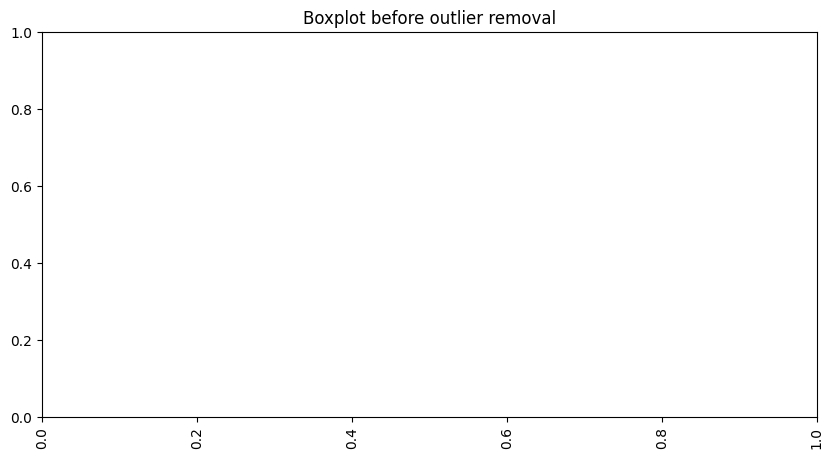


Interquartile Range, Q1, Q3, and outlier thresholds:
HUMAN PLAYER POSITION (Y) metres:
Q1: 1.0
Q3: 3.0
IQR: 2.0
Lower outlier threshold: -2.0
Upper outlier threshold: 6.0

INITITAL VELOCITY OF SHUTTELCOCK(m/s):
Q1: 10.0
Q3: 10.0
IQR: 0.0
Lower outlier threshold: 10.0
Upper outlier threshold: 10.0

INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE):
Q1: 40.0
Q3: 60.0
IQR: 20.0
Lower outlier threshold: 10.0
Upper outlier threshold: 90.0

SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE):
Q1: 6.0
Q3: 20.0
IQR: 14.0
Lower outlier threshold: -15.0
Upper outlier threshold: 41.0

SHUTTLECOCK POSITIION IN AIR(X ) metres:
Q1: 5.875451967749999
Q3: 8.43810822975
IQR: 2.562656262000001
Lower outlier threshold: 2.031467574749998
Upper outlier threshold: 12.282092622750001

SHUTTLECOCK POSITIION IN AIR(Y) metres:
Q1: 2.25134737125
Q3: 4.051472049999999
IQR: 1.8001246787499992
Lower outlier threshold: -0.4488396468749989
Upper outlier threshold: 6.751659068124998

SHUTTLECOCK POSITIION IN AIR(Z) metres:
Q1: 2.776

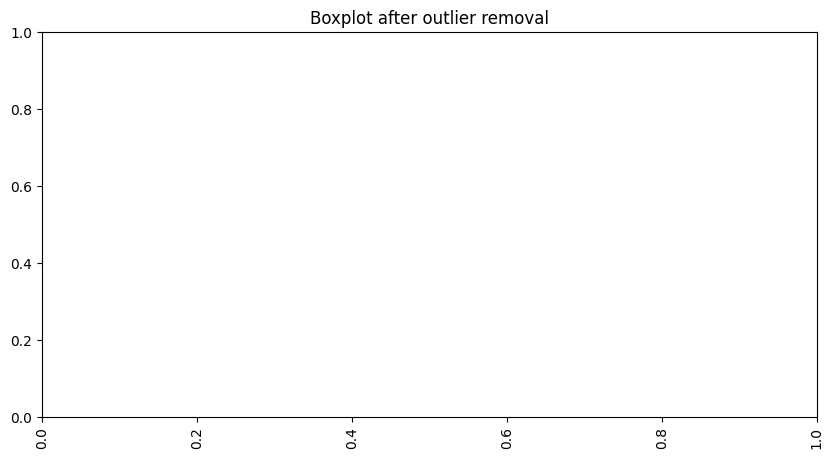

,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres,SHOT_ID
0,4,1,10,40,0,4.075543,1.000000,1.662912,1
1,4,1,10,40,0,4.152007,1.000000,1.724866,1
2,4,1,10,40,0,4.228906,1.000000,1.788139,1
3,4,1,10,40,0,4.302100,1.000000,1.845245,1
4,4,1,10,40,0,4.376877,1.000000,1.904128,1
...,...,...,...,...,...,...,...,...,...
49944,4,4,10,60,10,8.885213,4.861395,0.941893,499
49945,4,4,10,60,10,8.898323,4.863706,0.739085,499
49946,4,4,10,60,10,8.919513,4.867443,0.529859,499
49947,4,4,10,60,10,8.935025,4.870178,0.316693,499


In [11]:
#import seaborn as sns
import matplotlib.pyplot as plt

# Print initial data shape
print(f"\nInitial shape: {data2.shape}")

# Plotting before outlier removal
plt.figure(figsize=(10,5))
plt.title('Boxplot before outlier removal')
#sns.boxplot(data=df.iloc[:, 1:])  # Exclude the first column (SHOT_ID)
plt.xticks(rotation=90)
plt.show()

# Calculate Q1, Q3, and IQR
Q1 = data2.iloc[:, 1:].quantile(0.25)  # Exclude the first column (SHOT_ID)
Q3 = data2.iloc[:, 1:].quantile(0.75)  # Exclude the first column (SHOT_ID)
IQR = Q3 - Q1

# Duplicate the original dataframe for use in the next steps
df_temp = data2.copy()

print("\nInterquartile Range, Q1, Q3, and outlier thresholds:")  
for col in data2.columns[1:]:  # Exclude the first column (SHOT_ID)
    print(f"{col}:")
    print(f"Q1: {Q1[col]}") 
    print(f"Q3: {Q3[col]}") 
    print(f"IQR: {IQR[col]}")
    print(f"Lower outlier threshold: {Q1[col] - 1.5 * IQR[col]}")
    print(f"Upper outlier threshold: {Q3[col] + 1.5 * IQR[col]}\n")

# Calculate outlier mask for each row
for shot_id in data2['SHOT_ID'].unique():
    # Identify outlier rows before removing them
    outlier_mask = ((data2.iloc[:, 1:] < (Q1 - 1.5 * IQR)) | (data2.iloc[:, 1:] > (Q3 + 1.5 * IQR))).any(axis=1)
    df_temp.loc[df_temp['SHOT_ID'] == shot_id, 'outlier_mask'] = outlier_mask
    
# Create a dataframe of outliers
df_outliers = data2[outlier_mask].copy()

# Save outliers to CSV
df_outliers.to_csv("outliers.csv", index=False)

# Identify outlier SHOT_IDs
outlier_shot_ids = df_temp[df_temp['outlier_mask']].SHOT_ID.unique()

# Filter out outliers by SHOT_ID
df_no_outliers = df_temp[~df_temp['SHOT_ID'].isin(outlier_shot_ids)].drop(columns='outlier_mask')

# Calculate and print number of rows removed
removed_rows_outliers = data2.shape[0] - df_no_outliers.shape[0]
print(f"\nData after removing outliers: (removed {removed_rows_outliers} rows)")


# Print updated data shape
print(f"Current shape: {df_no_outliers.shape}")

# Plotting after outlier removal
plt.figure(figsize=(10,5))
plt.title('Boxplot after outlier removal')
#sns.boxplot(data=df_no_outliers.iloc[:, 1:])  # Exclude the first column (SHOT_ID)
plt.xticks(rotation=90)
plt.show()

# Update df to df_no_outliers
data2 = df_no_outliers
data2

Check data that is served out of court

In [12]:
import numpy as np

# Define court dimensions
court_length = 13.4  # in metres
court_width = 5.18  # in metres

# Initialize 'OUT_OF_COURT_SHOTS' column
data2 = data2.assign(OUT_OF_COURT_SHOTS = np.nan)

# Assign values to 'OUT_OF_COURT_SHOTS' column
data2['OUT_OF_COURT_SHOTS'] = np.where((data2['SHUTTLECOCK POSITIION IN AIR(X ) metres'] > court_length) | 
                                     (data2['SHUTTLECOCK POSITIION IN AIR(Y) metres'] > court_width), 0, 1)

# Count the number of 'IN' and 'OUT' rows
in_court = data2['OUT_OF_COURT_SHOTS'].sum()
out_of_court = data2.shape[0] - in_court

print(f"Number of 'IN' rows: {in_court}")
print(f"Number of 'OUT' rows: {out_of_court}")
data2

Number of 'IN' rows: 34166
Number of 'OUT' rows: 546


,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres,SHOT_ID,OUT_OF_COURT_SHOTS
0,4,1,10,40,0,4.075543,1.000000,1.662912,1,1
1,4,1,10,40,0,4.152007,1.000000,1.724866,1,1
2,4,1,10,40,0,4.228906,1.000000,1.788139,1,1
3,4,1,10,40,0,4.302100,1.000000,1.845245,1,1
4,4,1,10,40,0,4.376877,1.000000,1.904128,1,1
...,...,...,...,...,...,...,...,...,...,...
49944,4,4,10,60,10,8.885213,4.861395,0.941893,499,1
49945,4,4,10,60,10,8.898323,4.863706,0.739085,499,1
49946,4,4,10,60,10,8.919513,4.867443,0.529859,499,1
49947,4,4,10,60,10,8.935025,4.870178,0.316693,499,1


Re-number SHOT_ID after removed abnormal data rows

In [13]:
# Create sorted list of unique shotIds
shotIds = sorted(data2['SHOT_ID'].unique())

# Map old shotIds to new shotIds
map_dict = {old_id: new_id for new_id, old_id in enumerate(shotIds, start=1)}

# Replace old shotIds with new shotIds
data2.loc[:, 'SHOT_ID'] = data2['SHOT_ID'].replace(map_dict)

# Reorder columns
data2 = data2[['SHOT_ID', 'HUMAN PLAYER POSITION (X) metres', 'HUMAN PLAYER POSITION (Y) metres',
         'INITITAL VELOCITY OF SHUTTELCOCK(m/s)', 'INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)',
         'SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)', 'SHUTTLECOCK POSITIION IN AIR(X ) metres',
         'SHUTTLECOCK POSITIION IN AIR(Y) metres', 'SHUTTLECOCK POSITIION IN AIR(Z) metres', 'OUT_OF_COURT_SHOTS']]

data2

,SHOT_ID,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres,OUT_OF_COURT_SHOTS
0,1,4,1,10,40,0,4.075543,1.000000,1.662912,1
1,1,4,1,10,40,0,4.152007,1.000000,1.724866,1
2,1,4,1,10,40,0,4.228906,1.000000,1.788139,1
3,1,4,1,10,40,0,4.302100,1.000000,1.845245,1
4,1,4,1,10,40,0,4.376877,1.000000,1.904128,1
...,...,...,...,...,...,...,...,...,...,...
49944,250,4,4,10,60,10,8.885213,4.861395,0.941893,1
49945,250,4,4,10,60,10,8.898323,4.863706,0.739085,1
49946,250,4,4,10,60,10,8.919513,4.867443,0.529859,1
49947,250,4,4,10,60,10,8.935025,4.870178,0.316693,1


In [14]:
data2.to_csv("badmintondata2_cleaned_data.csv", index=False)

In [22]:
print(len(data2.loc[data2["SHOT_ID"] == 70]))

122
